In [1]:
import os
import re
import string
import pandas as pd
import torch
import torch.nn as nn

In [2]:
!rm bbc/README.TXT

rm: cannot remove 'bbc/README.TXT': No such file or directory


In [3]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

In [4]:
stops = stopwords.words("english")


def preprocess(text):
    text = text.lower()
    text = re.sub("\s+", " ", text)
    clean_text = []
    for word in text.split():
        if (word not in stops) and (word not in string.punctuation) and word.isalpha():
            clean_text.append(stemmer.stem(word))
    return " ".join(clean_text)

In [5]:
def load_data():
    texts, targets = [], []
    classes = os.listdir("bbc")
    print(classes)
    for class_ in classes:
        base = os.path.join("bbc", class_)
        print(base)
        if os.path.isdir(base):
            print(class_)
            text_class = []
            for txtfile in os.listdir(base):
                path = os.path.join("bbc", class_, txtfile)
                print("pp", path)
                with open(path, errors="ignore") as f:
                    text_class.append(preprocess(f.read()))
            texts.extend(text_class)
            targets.extend([class_] * len(text_class))
    return texts, targets

In [6]:
data = load_data()

['tech', 'politics', 'sport', 'business', 'entertainment']
bbc/tech
tech
pp bbc/tech/377.txt
pp bbc/tech/051.txt
pp bbc/tech/098.txt
pp bbc/tech/311.txt
pp bbc/tech/002.txt
pp bbc/tech/029.txt
pp bbc/tech/221.txt
pp bbc/tech/176.txt
pp bbc/tech/292.txt
pp bbc/tech/125.txt
pp bbc/tech/090.txt
pp bbc/tech/190.txt
pp bbc/tech/202.txt
pp bbc/tech/256.txt
pp bbc/tech/077.txt
pp bbc/tech/022.txt
pp bbc/tech/196.txt
pp bbc/tech/124.txt
pp bbc/tech/214.txt
pp bbc/tech/107.txt
pp bbc/tech/134.txt
pp bbc/tech/110.txt
pp bbc/tech/052.txt
pp bbc/tech/267.txt
pp bbc/tech/111.txt
pp bbc/tech/234.txt
pp bbc/tech/247.txt
pp bbc/tech/128.txt
pp bbc/tech/127.txt
pp bbc/tech/056.txt
pp bbc/tech/255.txt
pp bbc/tech/282.txt
pp bbc/tech/217.txt
pp bbc/tech/270.txt
pp bbc/tech/208.txt
pp bbc/tech/315.txt
pp bbc/tech/164.txt
pp bbc/tech/266.txt
pp bbc/tech/323.txt
pp bbc/tech/206.txt
pp bbc/tech/258.txt
pp bbc/tech/321.txt
pp bbc/tech/080.txt
pp bbc/tech/386.txt
pp bbc/tech/248.txt
pp bbc/tech/290.txt
pp bbc/

pp bbc/politics/107.txt
pp bbc/politics/134.txt
pp bbc/politics/110.txt
pp bbc/politics/052.txt
pp bbc/politics/416.txt
pp bbc/politics/267.txt
pp bbc/politics/111.txt
pp bbc/politics/234.txt
pp bbc/politics/247.txt
pp bbc/politics/128.txt
pp bbc/politics/127.txt
pp bbc/politics/056.txt
pp bbc/politics/255.txt
pp bbc/politics/282.txt
pp bbc/politics/217.txt
pp bbc/politics/270.txt
pp bbc/politics/208.txt
pp bbc/politics/315.txt
pp bbc/politics/164.txt
pp bbc/politics/266.txt
pp bbc/politics/323.txt
pp bbc/politics/206.txt
pp bbc/politics/258.txt
pp bbc/politics/321.txt
pp bbc/politics/080.txt
pp bbc/politics/386.txt
pp bbc/politics/248.txt
pp bbc/politics/290.txt
pp bbc/politics/145.txt
pp bbc/politics/175.txt
pp bbc/politics/388.txt
pp bbc/politics/163.txt
pp bbc/politics/169.txt
pp bbc/politics/083.txt
pp bbc/politics/367.txt
pp bbc/politics/150.txt
pp bbc/politics/191.txt
pp bbc/politics/336.txt
pp bbc/politics/060.txt
pp bbc/politics/144.txt
pp bbc/politics/249.txt
pp bbc/politics/

pp bbc/politics/117.txt
pp bbc/politics/297.txt
pp bbc/politics/213.txt
pp bbc/politics/293.txt
pp bbc/politics/068.txt
pp bbc/politics/036.txt
pp bbc/politics/074.txt
pp bbc/politics/205.txt
pp bbc/politics/179.txt
pp bbc/politics/086.txt
pp bbc/politics/358.txt
pp bbc/politics/027.txt
pp bbc/politics/141.txt
pp bbc/politics/204.txt
pp bbc/politics/359.txt
pp bbc/politics/405.txt
pp bbc/politics/016.txt
pp bbc/politics/199.txt
pp bbc/politics/339.txt
pp bbc/politics/360.txt
pp bbc/politics/305.txt
pp bbc/politics/158.txt
pp bbc/politics/407.txt
pp bbc/politics/065.txt
pp bbc/politics/368.txt
pp bbc/politics/362.txt
pp bbc/politics/197.txt
pp bbc/politics/203.txt
pp bbc/politics/101.txt
pp bbc/politics/274.txt
pp bbc/politics/132.txt
pp bbc/politics/229.txt
pp bbc/politics/010.txt
pp bbc/politics/268.txt
bbc/sport
sport
pp bbc/sport/377.txt
pp bbc/sport/051.txt
pp bbc/sport/098.txt
pp bbc/sport/457.txt
pp bbc/sport/458.txt
pp bbc/sport/311.txt
pp bbc/sport/002.txt
pp bbc/sport/029.txt


pp bbc/sport/395.txt
pp bbc/sport/459.txt
pp bbc/sport/309.txt
pp bbc/sport/509.txt
pp bbc/sport/423.txt
pp bbc/sport/082.txt
pp bbc/sport/355.txt
pp bbc/sport/063.txt
pp bbc/sport/219.txt
pp bbc/sport/374.txt
pp bbc/sport/093.txt
pp bbc/sport/017.txt
pp bbc/sport/400.txt
pp bbc/sport/291.txt
pp bbc/sport/211.txt
pp bbc/sport/151.txt
pp bbc/sport/454.txt
pp bbc/sport/156.txt
pp bbc/sport/466.txt
pp bbc/sport/003.txt
pp bbc/sport/123.txt
pp bbc/sport/401.txt
pp bbc/sport/130.txt
pp bbc/sport/265.txt
pp bbc/sport/034.txt
pp bbc/sport/133.txt
pp bbc/sport/354.txt
pp bbc/sport/499.txt
pp bbc/sport/064.txt
pp bbc/sport/451.txt
pp bbc/sport/296.txt
pp bbc/sport/352.txt
pp bbc/sport/335.txt
pp bbc/sport/246.txt
pp bbc/sport/041.txt
pp bbc/sport/303.txt
pp bbc/sport/099.txt
pp bbc/sport/337.txt
pp bbc/sport/253.txt
pp bbc/sport/001.txt
pp bbc/sport/480.txt
pp bbc/sport/007.txt
pp bbc/sport/168.txt
pp bbc/sport/171.txt
pp bbc/sport/432.txt
pp bbc/sport/348.txt
pp bbc/sport/030.txt
pp bbc/sport/

pp bbc/business/210.txt
pp bbc/business/058.txt
pp bbc/business/243.txt
pp bbc/business/372.txt
pp bbc/business/394.txt
pp bbc/business/403.txt
pp bbc/business/116.txt
pp bbc/business/440.txt
pp bbc/business/470.txt
pp bbc/business/184.txt
pp bbc/business/356.txt
pp bbc/business/465.txt
pp bbc/business/318.txt
pp bbc/business/351.txt
pp bbc/business/414.txt
pp bbc/business/242.txt
pp bbc/business/437.txt
pp bbc/business/200.txt
pp bbc/business/119.txt
pp bbc/business/418.txt
pp bbc/business/044.txt
pp bbc/business/035.txt
pp bbc/business/308.txt
pp bbc/business/143.txt
pp bbc/business/287.txt
pp bbc/business/382.txt
pp bbc/business/142.txt
pp bbc/business/295.txt
pp bbc/business/104.txt
pp bbc/business/251.txt
pp bbc/business/028.txt
pp bbc/business/324.txt
pp bbc/business/406.txt
pp bbc/business/285.txt
pp bbc/business/165.txt
pp bbc/business/316.txt
pp bbc/business/431.txt
pp bbc/business/262.txt
pp bbc/business/357.txt
pp bbc/business/054.txt
pp bbc/business/162.txt
pp bbc/business/

pp bbc/entertainment/150.txt
pp bbc/entertainment/191.txt
pp bbc/entertainment/336.txt
pp bbc/entertainment/060.txt
pp bbc/entertainment/144.txt
pp bbc/entertainment/249.txt
pp bbc/entertainment/334.txt
pp bbc/entertainment/331.txt
pp bbc/entertainment/329.txt
pp bbc/entertainment/319.txt
pp bbc/entertainment/109.txt
pp bbc/entertainment/120.txt
pp bbc/entertainment/102.txt
pp bbc/entertainment/224.txt
pp bbc/entertainment/341.txt
pp bbc/entertainment/193.txt
pp bbc/entertainment/024.txt
pp bbc/entertainment/384.txt
pp bbc/entertainment/216.txt
pp bbc/entertainment/160.txt
pp bbc/entertainment/033.txt
pp bbc/entertainment/115.txt
pp bbc/entertainment/067.txt
pp bbc/entertainment/371.txt
pp bbc/entertainment/152.txt
pp bbc/entertainment/126.txt
pp bbc/entertainment/232.txt
pp bbc/entertainment/114.txt
pp bbc/entertainment/340.txt
pp bbc/entertainment/343.txt
pp bbc/entertainment/310.txt
pp bbc/entertainment/026.txt
pp bbc/entertainment/264.txt
pp bbc/entertainment/103.txt
pp bbc/enterta

pp bbc/entertainment/167.txt
pp bbc/entertainment/096.txt
pp bbc/entertainment/100.txt
pp bbc/entertainment/014.txt
pp bbc/entertainment/215.txt
pp bbc/entertainment/250.txt
pp bbc/entertainment/375.txt
pp bbc/entertainment/157.txt
pp bbc/entertainment/364.txt
pp bbc/entertainment/289.txt
pp bbc/entertainment/345.txt
pp bbc/entertainment/117.txt
pp bbc/entertainment/297.txt
pp bbc/entertainment/213.txt
pp bbc/entertainment/293.txt
pp bbc/entertainment/068.txt
pp bbc/entertainment/036.txt
pp bbc/entertainment/074.txt
pp bbc/entertainment/205.txt
pp bbc/entertainment/179.txt
pp bbc/entertainment/086.txt
pp bbc/entertainment/358.txt
pp bbc/entertainment/027.txt
pp bbc/entertainment/141.txt
pp bbc/entertainment/204.txt
pp bbc/entertainment/359.txt
pp bbc/entertainment/016.txt
pp bbc/entertainment/199.txt
pp bbc/entertainment/339.txt
pp bbc/entertainment/360.txt
pp bbc/entertainment/305.txt
pp bbc/entertainment/158.txt
pp bbc/entertainment/065.txt
pp bbc/entertainment/368.txt
pp bbc/enterta

In [7]:
len(data[0]), len(data[1])

(2225, 2225)

In [8]:
from collections import Counter

c = Counter(data[1])
c

Counter({'tech': 401,
         'politics': 417,
         'sport': 511,
         'business': 510,
         'entertainment': 386})

In [9]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
len(data[0])

2225

In [11]:
counts = []
for text in data[0]:
    counts.append(len(text.split()))

/home/wisdom/.local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

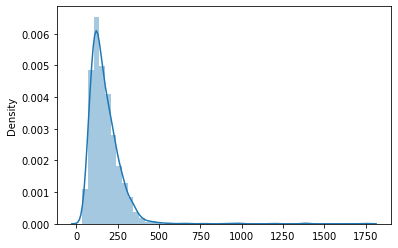

In [12]:
import seaborn as sns

sns.distplot(counts)

In [13]:
sum(counts) / len(counts)

172.8638202247191

In [14]:
c = Counter(counts)
c.most_common(20)

[(107, 30),
 (125, 26),
 (105, 22),
 (121, 20),
 (140, 20),
 (114, 20),
 (117, 20),
 (108, 19),
 (118, 19),
 (132, 19),
 (123, 19),
 (109, 19),
 (155, 18),
 (144, 18),
 (153, 18),
 (131, 17),
 (141, 17),
 (124, 17),
 (88, 17),
 (130, 16)]

In [15]:
df = pd.DataFrame({"texts": data[0], "labels": data[1]})

In [16]:
df

,texts,labels
0,california set fine spywar maker comput progra...,tech
1,blind student blind student develop softwar tu...,tech
2,mobil rack year use mobil phone uk celebr anni...,tech
3,mobil game come age bbc news websit take look ...,tech
4,china net cafe cultur crackdown chines author ...,tech
...,...,...
2220,tv present deeley drop cat deeley resign host ...,entertainment
2221,hard act follow outkast us rap duo trio trophi...,entertainment
2222,new york rocker top talent poll new york group...,entertainment
2223,uganda ban vagina monologu author ban play vag...,entertainment


In [17]:
from collections import OrderedDict


def pad(words, seq_length=100):
    if len(words) < seq_length:
        words += ["<pad>"] * (seq_length - len(words))
    return words[:seq_length]


class Vocab:
    def __init__(self):
        self.word2id = OrderedDict({"<pad>": 0, "<unk>": 1})
        self.len = 2

    def __len__(self):
        return self.len

    def add_word(self, word):
        if not self.word2id.get(word):
            self.len += 1
            self.word2id[word] = self.len - 1

    def add_sent(self, sent):
        for word in sent.split():
            self.add_word(word)

    def get_index(self, word):
        id_ = self.word2id.get(word, None)
        if id_ is None:
            id_ = self.word2id["<unk>"]
        return id_

    def get_word(self, id_):
        return list(self.word2id.keys())[id_]


vocab = Vocab()

In [18]:
vocab = Vocab()
for sent in df.texts:
    vocab.add_sent(sent)
word2paddedindex = lambda sentence: [
    vocab.get_index(word) for word in pad(sentence.split(), 200)
]
token_index = df.texts.apply(word2paddedindex)

In [19]:
p = 656
" ".join(df.texts[p].split()[:100]), df.labels[p]

('armi chief regiment decis militari chief expect meet make final decis futur armi committe armi made senior defenc discuss plan restructur regiment propos includ cut six regiment five merg super plan face stiff opposit campaign politician decis must ratifi defenc secretari geoff hoon prime minist toni expect made public next minist announc reorganis armi drew question mark futur black king scottish royal royal highland fusili argyl sutherland council scottish colonel propos merger royal scot scottish border singl would one five new super propos either merg amalgam six regiment super regiment spark polit labour backbench opposit politician oppos felt time insensit',
 'politics')

In [20]:
token_index

0       [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...
1       [109, 110, 109, 110, 111, 22, 106, 112, 113, 1...
2       [219, 220, 221, 191, 219, 222, 223, 224, 225, ...
3       [219, 316, 39, 198, 160, 161, 78, 72, 317, 316...
4       [528, 529, 530, 531, 532, 533, 534, 433, 529, ...
                              ...                        
2220    [1111, 1876, 16082, 1376, 2291, 16082, 4517, 1...
2221    [63, 69, 319, 14076, 168, 1001, 722, 8199, 546...
2222    [17, 124, 14749, 1053, 4588, 2918, 17, 124, 58...
2223    [8624, 70, 16087, 16088, 534, 70, 343, 16087, ...
2224    [3235, 14288, 1053, 3635, 2158, 2918, 3235, 14...
Name: texts, Length: 2225, dtype: object

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = le.fit_transform(df.labels)

In [22]:
from torch.utils import data
import torch.nn as nn
import torch


def load_batch(array, batch_size):
    train_size = int(0.8 * len(array[0]))
    test_size = len(array[0]) - train_size
    dataset = data.TensorDataset(*array)
    train_dataset, test_dataset = data.random_split(dataset, [train_size, test_size])
    return (
        data.DataLoader(train_dataset, batch_size, shuffle=True),
        data.DataLoader(test_dataset, 1000, shuffle=False),
    )

In [23]:
class Model(nn.Module):
    def __init__(self, embed_size, hidden_dim, num_layers, **kwargs):
        super(Model, self).__init__(**kwargs)
        self.embeddings = nn.Embedding(
            num_embeddings=vocab.len, embedding_dim=embed_size
        )
        self.encoder = nn.LSTM(
            embed_size, hidden_dim, num_layers, dropout=0.2, bidirectional=True
        )
        self.drop = nn.Dropout(0.6)
        self.decoder = nn.Linear(4 * hidden_dim, df.labels.unique().shape[0])

    def forward(self, inputs):
        embeddings = self.drop(self.embeddings(inputs.T))

        outputs, _ = self.encoder(embeddings)
        encoding = torch.cat((outputs[0], outputs[-1]), dim=1)
        outs = self.decoder(encoding)
        return outs

In [24]:
train_iter, test_iter = load_batch(
    (torch.tensor([list(i) for i in token_index]), torch.tensor(labels)), 64
)
net = Model(100, 16, 1)

/home/wisdom/.local/lib/python3.9/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [25]:
gg = next(iter(train_iter))
net(gg[0])[0]

tensor([ 0.0266,  0.0552,  0.0871, -0.0273, -0.1349],
       grad_fn=<SelectBackward0>)

In [26]:
def accuracy(y_hat, y):
    y_hat = torch.argmax(y_hat, dim=1)
    #     print(y_hat, y)
    #     raise Exception
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)
    cmp = y_hat.type(y.dtype) == y
    return float(cmp.type(y.dtype).sum()) / len(y)

In [27]:
num_epochs = 70
lr = 0.001
trainer = torch.optim.Adam(net.parameters(), lr=lr)
loss = nn.CrossEntropyLoss()
accuracies = []
test_accuracies = []
losses = []
for epoch in range(num_epochs):
    for i, (features, labels_) in enumerate(train_iter):
        if i % 2 == 0:
            print(f"iter {i}")
        trainer.zero_grad()
        labels_ = labels_
        features = features
        pred = net(features)
        l = loss(pred, labels_)
        l.sum().backward()
        trainer.step()
        train_acc = accuracy(pred, labels_)
        train_loss_sum = l.sum()
    with torch.no_grad():
        train_acc = accuracy(pred, labels_)
        for X, y in test_iter:
            X = X.type(torch.LongTensor)
            y = y.type(torch.LongTensor)
            test_pred = net(X)
            test_acc = accuracy(test_pred, y)
            break
    accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    losses.append(train_loss_sum)
    print(
        f"Epoch: {epoch} - Loss: {l.sum()} - train_accuracy: {train_acc} - test_accuracy: {test_acc}"
    )

iter 0
iter 2
iter 4
iter 6
iter 8
iter 10
iter 12
iter 14
iter 16
iter 18
iter 20
iter 22
iter 24
iter 26
Epoch: 0 - Loss: 1.5808768272399902 - train_accuracy: 0.25 - test_accuracy: 0.26292134831460673
iter 0
iter 2
iter 4
iter 6
iter 8
iter 10
iter 12
iter 14
iter 16
iter 18
iter 20
iter 22
iter 24
iter 26
Epoch: 1 - Loss: 1.5779348611831665 - train_accuracy: 0.23076923076923078 - test_accuracy: 0.27191011235955054
iter 0
iter 2
iter 4
iter 6
iter 8
iter 10
iter 12
iter 14
iter 16
iter 18
iter 20
iter 22
iter 24
iter 26
Epoch: 2 - Loss: 1.5045416355133057 - train_accuracy: 0.3269230769230769 - test_accuracy: 0.2808988764044944
iter 0
iter 2
iter 4
iter 6
iter 8
iter 10
iter 12
iter 14
iter 16
iter 18
iter 20
iter 22
iter 24
iter 26
Epoch: 3 - Loss: 1.5566328763961792 - train_accuracy: 0.2692307692307692 - test_accuracy: 0.27191011235955054
iter 0
iter 2
iter 4
iter 6
iter 8
iter 10
iter 12
iter 14
iter 16
iter 18
iter 20
iter 22
iter 24
iter 26
Epoch: 4 - Loss: 1.617695927619934 - tr

iter 2
iter 4
iter 6
iter 8
iter 10
iter 12
iter 14
iter 16
iter 18
iter 20
iter 22
iter 24
iter 26
Epoch: 38 - Loss: 0.41396263241767883 - train_accuracy: 0.8846153846153846 - test_accuracy: 0.7573033707865169
iter 0
iter 2
iter 4
iter 6
iter 8
iter 10
iter 12
iter 14
iter 16
iter 18
iter 20
iter 22
iter 24
iter 26
Epoch: 39 - Loss: 0.44928985834121704 - train_accuracy: 0.8846153846153846 - test_accuracy: 0.7910112359550562
iter 0
iter 2
iter 4
iter 6
iter 8
iter 10
iter 12
iter 14
iter 16
iter 18
iter 20
iter 22
iter 24
iter 26
Epoch: 40 - Loss: 0.42667248845100403 - train_accuracy: 0.8461538461538461 - test_accuracy: 0.8067415730337079
iter 0
iter 2
iter 4
iter 6
iter 8
iter 10
iter 12
iter 14
iter 16
iter 18
iter 20
iter 22
iter 24
iter 26
Epoch: 41 - Loss: 0.22302578389644623 - train_accuracy: 0.8846153846153846 - test_accuracy: 0.7730337078651686
iter 0
iter 2
iter 4
iter 6
iter 8
iter 10
iter 12
iter 14
iter 16
iter 18
iter 20
iter 22
iter 24
iter 26
Epoch: 42 - Loss: 0.30735066

KeyboardInterrupt: 

In [34]:
acccs = []
for X, y in test_iter:
    X = X.type(torch.LongTensor)
    y = y.type(torch.LongTensor)
    test_pred = net(X)
    test_acc = accuracy(test_pred, y)
    print(test_acc)

0.8426966292134831


In [88]:
acccs

[]

In [35]:
preprocess("wisdom is the greatest in the world")

'wisdom greatest world'

In [ ]:
le.

In [36]:
def predict(texts):
    texts = [preprocess(text) for text in texts]
    token_indexes = [word2paddedindex(text) for text in texts]
    tensor = torch.tensor(token_indexes)
    preds = net(tensor).argmax(axis=1)
    return le.inverse_transform(preds)

In [37]:
predict(["wisdom is the best in the motherfucking world", "I love hacking computers"])

array(['sport', 'politics'], dtype=object)

In [78]:
text = """ Roche 'turns down Federer offer'

Australian tennis coach Tony Roche has turned down an approach from Roger Federer to be the world number one's new full-time coach, say reports.

Melbourne's Herald-Sun said Roche, troubled by a hip complaint, did not want to travel full-time again. However, Roche is happy to work with the Swiss star on a casual basis and is helping him prepare for next month's defence of his Australian Open crown. Federer has been without a coach since splitting with Peter Lundgren in 2003. Roche, a former Davis Cup player for Australia, won the French Open, reached the Wimbledon and US Open finals and won five Wimbledon doubles titles with John Newcombe.

He also coached former number one Ivan Lendl and Pat Rafter to Grand Slam victories and has worked with Australia's Lleyton Hewitt. Some reports claim Federer initially wanted Andre Agassi's Australian coach Darren Cahill, before Agassi confirmed he would play on in 2005. Federer was named Swiss sportsman of the year on Saturday, to add to the BBC overseas sportsman and European Sports Journalists Association awards he has already won."""

In [80]:
predict(text)

('sport',
 tensor([[0.0032, 0.2981, 0.0044, 0.6861, 0.0082]], grad_fn=<SoftmaxBackward0>))

In [71]:
le.classes_.shape

(5,)

In [40]:
import joblib

joblib.dump(vocab, "vocab.bin")
joblib.dump(le, "label_encoder.bin")
torch.save(net.state_dict(), "bbc_classification.pth")

In [75]:
le.classes_

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

In [84]:
vocab = joblib.load("vocab.bin")
net = Model(100, 16, 1)
le = joblib.load("label_encoder.bin")
net.load_state_dict(torch.load("bbc_classification.pth"))


def predict(text):
    text = preprocess(text)
    token_indexes = word2paddedindex(text)
    tensor = torch.tensor([token_indexes])
    preds = net(tensor)
    index = preds.argmax(axis=1)
    return le.inverse_transform(index)[0], float(torch.softmax(preds, 1)[0][index])


predict(text)

('sport', 0.9628514051437378)

In [61]:
import gradio as gr

In [86]:
demo = gr.Interface(fn=predict, inputs="text", outputs=["text", "number"])

In [87]:
demo.launch()

Running on local URL:  http://127.0.0.1:7861/

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x7f3e942e4b50>, 'http://127.0.0.1:7861/', None)